## MOTIVATION


The cost of hospital readmission accounts for a large portion of hospital inpatient services spending. Diabetes is not only one of the top ten leading causes of death in the world, but also the most expensive chronic disease in the United State. Hospitalized patients with diabetes are at higher risk of readmission than those without diabetes. Therefore, reducing readmission rates for diabetic patients has a great potential to reduce medical cost significantly. 


## OBJECTIVE

 The objective of this study is to predict the likelihood of a diabetic patient being readmitted.
 

## DATASET

The original dataset was obtained from the Center for Machine Learning and Intelligent Systems at University of California, Irvine. It was collected from 130 hospitals in the U.S. during a period of 10 years (1999 to 2008). It contains 101,766 observations and 50 features. After cleaning the data, it was left with 27 features. These are:
 - Race (Caucasian, African American, Asian, Other)
 - Gender (Male, Female)
 - Age (0-40, 40-50, 50-60, 60-70, 70-80, 80-100)
 - Admission Type (Emergency, Elective, Other, Newborn)
 - Discharge Disposition (Home, Other)
 - Admission Source (Emergency Room, Physician Referral, Other)
 - Time in hospital: Number of days between admission and discharge
 - Number of lab procedures: Numeric number of lab tests performed during the encounter
 - Number of procedures: Numeric number of procedures (other than lab tests) performed during the encounter
 - Number of medications: Number of distinct generic names administered during the encounter
 - Number of outpatient visits: Number of outpatient visits of the patient in the year preceding the encounter
 - Number of emergency visits: Number of emergency visits of the patient in the year preceding the encounter
 - Number of inpatient visits: Number of inpatient visits of the patient in the year preceding the encounter
 - Number of diagnoses: Number of diagnoses entered to the system 0%
 - Glucose serum test result (>200, >300, normal, and none if not measured): Indicates the range of the glucose serum test result.
 - HbA1c test result (>8 if the result was greater than 8%, >7 if the result was greater than 7% but less than 8%, normal if the result was less than 7%, and none if not measured): Indicates the range of the result or if the test was not taken.
 - 7 features for medications for the generic names: metformin, glimepiride, glipizide, glyburide, pioglitazone, rosiglitazone, insulin (Up if the dosage was increased during the encounter, down if the dosage was decreased, steady if the dosage did not change, and no if the drug was not prescribed): Indicates whether the drug was prescribed or there was a change in the dosage. 
 - Change of medications (change and no change): Indicates if there was a change in diabetic medications (either dosage or generic name).
 - Diabetes medications (yes and no): Indicates if there was any diabetic medication prescribed. 
 - Readmitted Days to inpatient readmission (0 if the patient was readmitted in more than 30 days or there is no record of readmission and 1 if the patient was readmitted in less than 30 days



In [1]:
from IPython.display import HTML

%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.style.use('ggplot')
sns.color_palette("Set2")


# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14

import statsmodels.formula.api as smf
import statsmodels.tools.eval_measures as smf_metrics
from sklearn import feature_selection, linear_model, metrics

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, mean_squared_error, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

#from sklearn import model_selection

## Loading data/Summary Statistics

In [2]:
df = pd.read_csv("diabetics_readmissions.csv")

In [3]:
df.head()

,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,primary_diagnosis
0,Caucasian,Female,[0-40],Other,Other,Physician Referral,1,41,0,1,...,No,No,No,No,No,No,No,No,0,Diabetes
1,Caucasian,Female,[0-40],Emergency,Home,Emergency Room,3,59,0,18,...,No,No,No,No,No,Up,Ch,Yes,0,Other
2,AfricanAmerican,Female,[0-40],Emergency,Home,Emergency Room,2,11,5,13,...,No,Steady,No,No,No,No,No,Yes,0,Other
3,Caucasian,Male,[0-40],Emergency,Home,Emergency Room,2,44,1,16,...,No,No,No,No,No,Up,Ch,Yes,0,Other
4,Caucasian,Male,[40-50],Emergency,Home,Emergency Room,1,51,0,8,...,No,Steady,No,No,No,Steady,Ch,Yes,0,Neoplasms


In [4]:
df.tail()

,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,primary_diagnosis
68153,Caucasian,Female,[70-80],Emergency,Home,Emergency Room,9,50,2,33,...,No,No,Up,No,No,Steady,Ch,Yes,0,Digestive
68154,Other,Female,[40-50],Emergency,Home,Emergency Room,14,73,6,26,...,No,Steady,No,No,No,Up,Ch,Yes,0,Genitourinary
68155,Other,Female,[60-70],Emergency,Home,Emergency Room,2,46,6,17,...,No,No,No,No,No,Steady,No,Yes,0,Injury
68156,Caucasian,Female,[80-100],Emergency,Home,Emergency Room,5,76,1,22,...,No,No,No,No,No,Up,Ch,Yes,0,Other
68157,Caucasian,Male,[70-80],Emergency,Home,Emergency Room,6,13,3,3,...,No,No,No,No,No,No,No,No,0,Digestive


In [5]:
df.shape

(68158, 27)

In [6]:
df.isnull().sum()[df.isnull().sum() != 0]

Series([], dtype: int64)

In [7]:
df.dtypes

race                     object
gender                   object
age                      object
admission_type           object
discharge_disposition    object
admission_source         object
time_in_hospital          int64
num_lab_procedures        int64
num_procedures            int64
num_medications           int64
number_outpatient         int64
number_emergency          int64
number_inpatient          int64
number_diagnoses          int64
max_glu_serum            object
HbA1c                    object
metformin                object
glimepiride              object
glipizide                object
glyburide                object
pioglitazone             object
rosiglitazone            object
insulin                  object
change                   object
diabetesMed              object
readmitted                int64
primary_diagnosis        object
dtype: object

In [8]:
categorical_y = ["readmitted"]

X = df.drop(["readmitted"], axis = 1)
categorical_X = list((X.dtypes == "object")[X.dtypes == "object"].index)
continuous_X = list((X.dtypes == "int64")[X.dtypes == "int64"].index)

In [9]:
y = df[categorical_y].astype("object")
X_continuous = df[continuous_X]
X_categorical = df[categorical_X]

In [10]:
X_categorical.describe().transpose()

,count,unique,top,freq
race,68158,5,Caucasian,52383
gender,68158,2,Female,36319
age,68158,6,[70-80],17299
admission_type,68158,4,Emergency,46888
discharge_disposition,68158,2,Home,43089
admission_source,68158,3,Emergency Room,36619
max_glu_serum,68158,4,None,64850
HbA1c,68158,4,None,55679
metformin,68158,4,No,53659
glimepiride,68158,4,No,64584


In [11]:
X_continuous.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,68158.0,4.274407,2.934463,1.0,2.0,3.0,6.0,14.0
num_lab_procedures,68158.0,42.846210,19.921687,1.0,31.0,44.0,57.0,132.0
num_procedures,68158.0,1.426406,1.754620,0.0,0.0,1.0,2.0,6.0
num_medications,68158.0,15.663106,8.276648,1.0,10.0,14.0,20.0,81.0
number_outpatient,68158.0,0.283327,1.073510,0.0,0.0,0.0,0.0,42.0
number_emergency,68158.0,0.105842,0.517210,0.0,0.0,0.0,0.0,42.0
number_inpatient,68158.0,0.179392,0.606507,0.0,0.0,0.0,0.0,12.0
number_diagnoses,68158.0,7.241028,1.995448,1.0,6.0,8.0,9.0,16.0


## Exploring Response

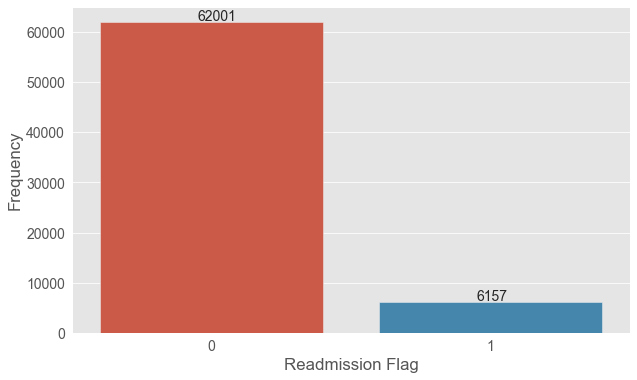

In [12]:
ax = sns.countplot(x = "readmitted", data = df)
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.35, p.get_height()+250))
ax.set_xlabel("Readmission Flag")
ax.set_ylabel("Frequency")
plt.show()

## Exploring Features

### Exploring Race

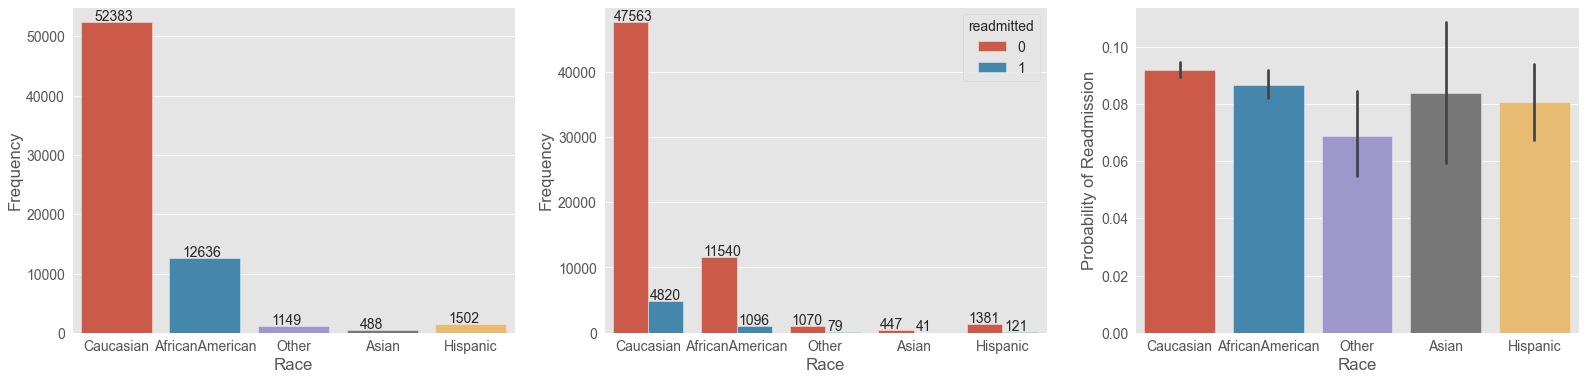

In [13]:
fig, axes = plt.subplots(1,3, figsize=(27,6))

#ax1 = X_categorical["race"].value_counts().plot(kind = "barh", title = "Distribution of Race", ax=axes[0])


ax1 = sns.countplot(ax=axes[0], x = "race", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+250))
ax1.set_xlabel("Race")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="race", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.02, p.get_height()+250))
ax2.set_xlabel('Race')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "race", y="readmitted", data = df)
ax3.set_xlabel("Race")
ax3.set_ylabel("Probability of Readmission")

plt.show()

In [14]:
df["race"] = df["race"].replace({"Asian": "Other",
                                 "Hispanic": "Other"})


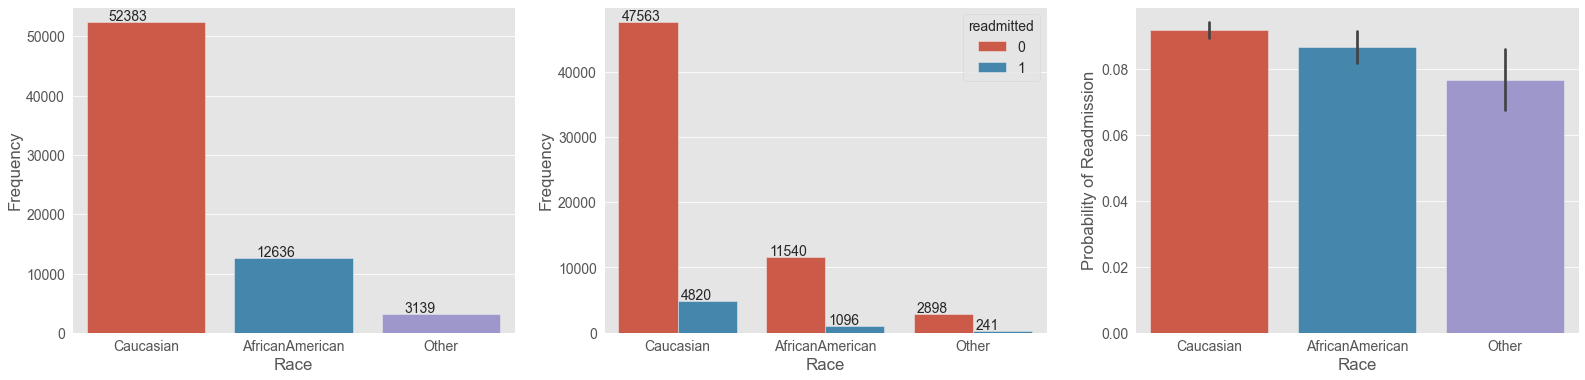

In [15]:
fig, axes = plt.subplots(1,3, figsize=(27,6))

#ax1 = X_categorical["race"].value_counts().plot(kind = "barh", title = "Distribution of Race", ax=axes[0])


ax1 = sns.countplot(ax=axes[0], x = "race", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+250))
ax1.set_xlabel("Race")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="race", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.02, p.get_height()+250))
ax2.set_xlabel('Race')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "race", y="readmitted", data = df)
ax3.set_xlabel("Race")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Gender

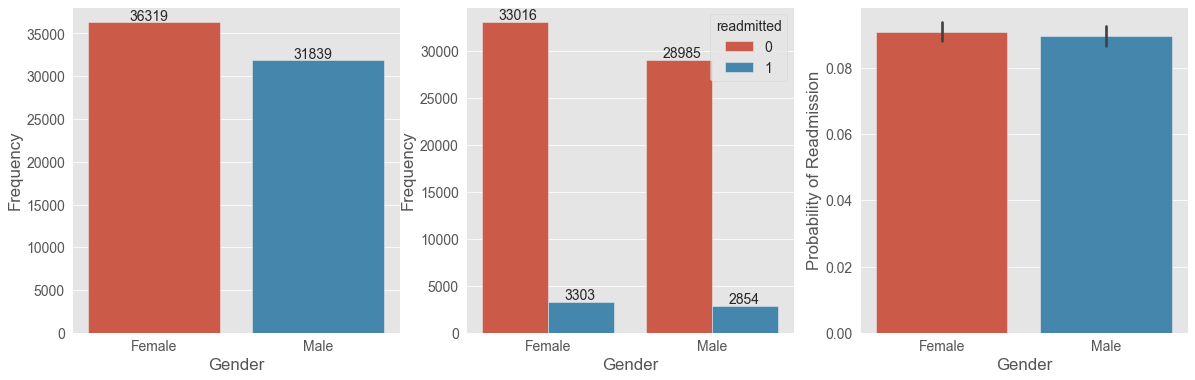

In [16]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["gender"].value_counts().plot(kind = "barh", title = "Distribution of Gender", ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "gender", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+250))
ax1.set_xlabel("Gender")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="gender", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+250))
ax2.set_xlabel('Gender')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "gender", y="readmitted", data = df)
ax3.set_xlabel("Gender")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Age

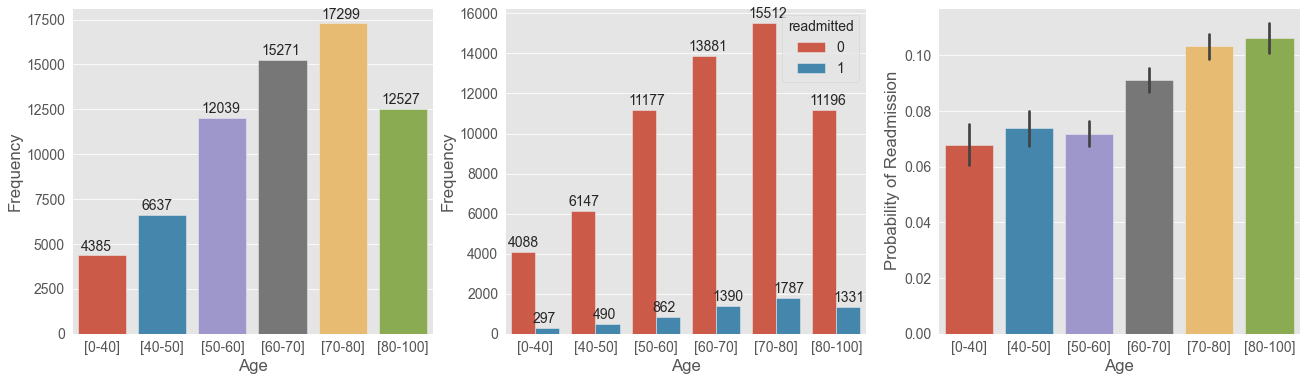

In [17]:
fig, axes = plt.subplots(1,3, figsize=(22,6))

#ax1 = X_categorical["age"].value_counts().plot(kind = "barh", title = "Distribution of Age", ax=axes[0])
#ax1

ax1 = sns.countplot(ax=axes[0], x = "age", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+250))
ax1.set_xlabel("Age")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="age", hue= "readmitted", data = df)
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()-0.05, p.get_height()+250))
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "age", y="readmitted", data = df)
ax3.set_xlabel("Age")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Admission Type

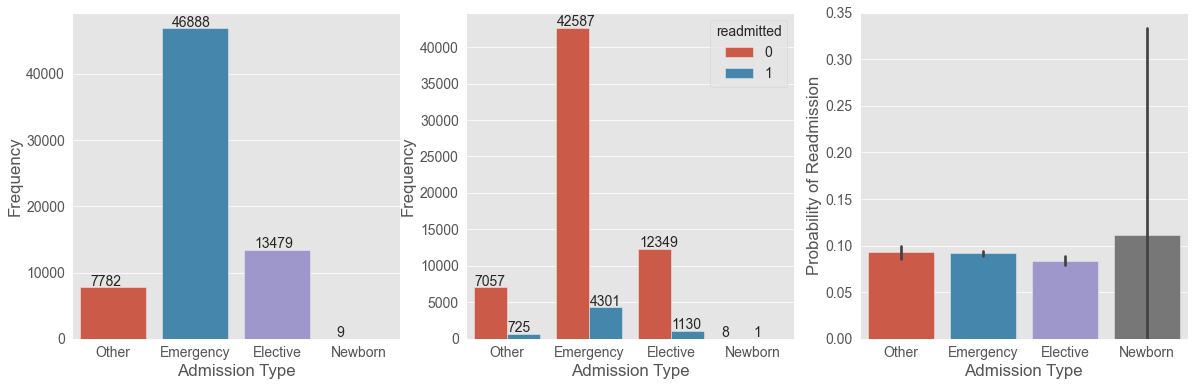

In [18]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["admission_type"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Admission Type",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "admission_type", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.12, p.get_height()+250))
ax1.set_xlabel("Admission Type")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="admission_type", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+250))
ax2.set_xlabel('Admission Type')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "admission_type", y="readmitted", data = df)
ax3.set_xlabel("Admission Type")
ax3.set_ylabel("Probability of Readmission")

plt.show()

In [19]:
df["admission_type"] = df["admission_type"].replace({"Elective": "Non-Emergency",
                                                     "Newborn": "Non-Emergency",
                                                     "Other": "Non-Emergency"})
df["admission_type"].unique()

array(['Non-Emergency', 'Emergency'], dtype=object)

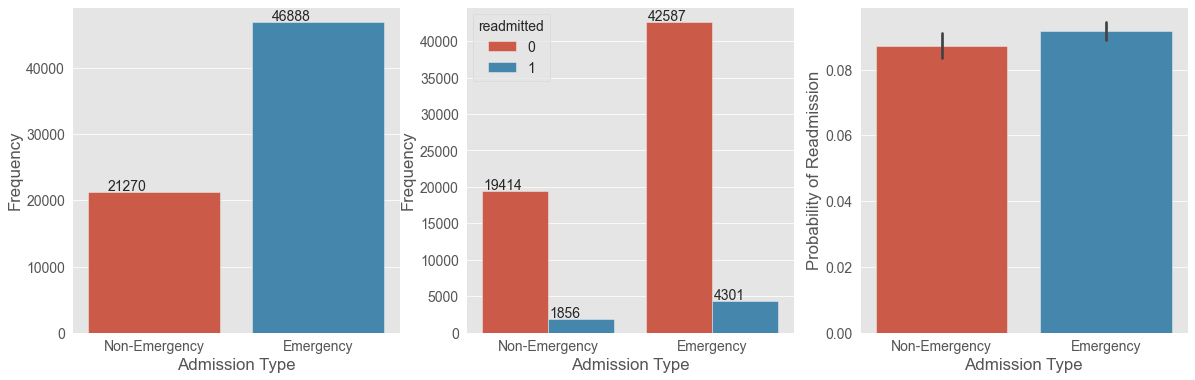

In [20]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["admission_type"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Admission Type",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "admission_type", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.12, p.get_height()+250))
ax1.set_xlabel("Admission Type")
ax1.set_ylabel("Frequency")

ax2 = sns.countplot(ax=axes[1],x="admission_type", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+250))
ax2.set_xlabel('Admission Type')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "admission_type", y="readmitted", data = df)
ax3.set_xlabel("Admission Type")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Discharge Disposition

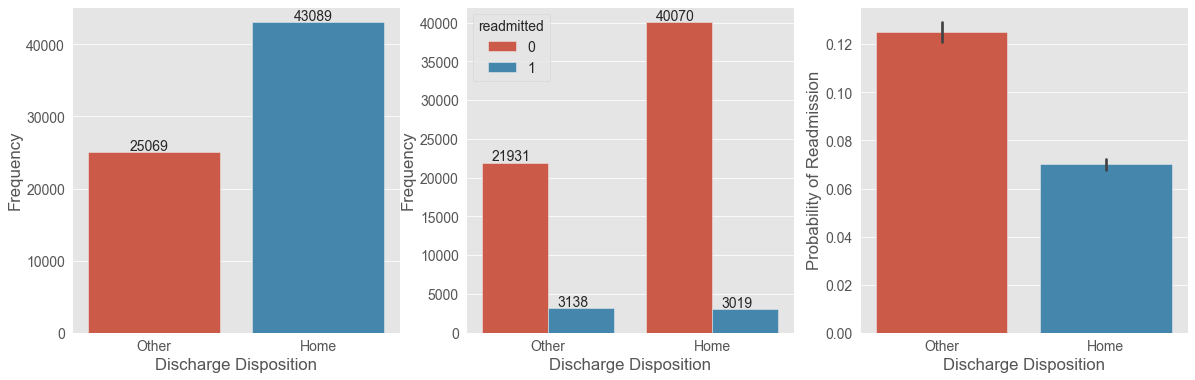

In [21]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["discharge_disposition"].value_counts().plot(kind = "barh", title = "Distribution of Discharge Disposition", ax=axes[0])
#ax1


ax1 = sns.countplot(ax=axes[0], x = "discharge_disposition", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+250))
ax1.set_xlabel("Discharge Disposition")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="discharge_disposition", hue= "readmitted", data = df)
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.06, p.get_height()+250))
ax2.set_xlabel('Discharge Disposition')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "discharge_disposition", y="readmitted", data = df)
ax3.set_xlabel("Discharge Disposition")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Admission Source

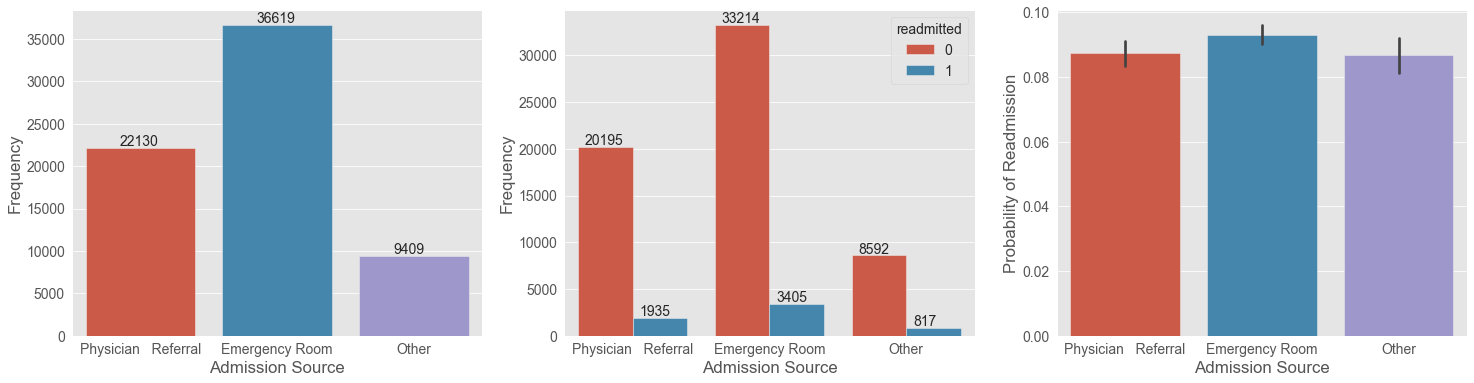

In [22]:
fig, axes = plt.subplots(1,3, figsize=(25,6))

#ax1 = X_categorical["admission_source"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Admission Source",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "admission_source", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+250))
ax1.set_xlabel("Admission Source")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="admission_source", hue= "readmitted", data = df)
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+250))
ax2.set_xlabel('Admission Source')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "admission_source", y="readmitted", data = df)
ax3.set_xlabel("Admission Source")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Maximum Glucose Serum

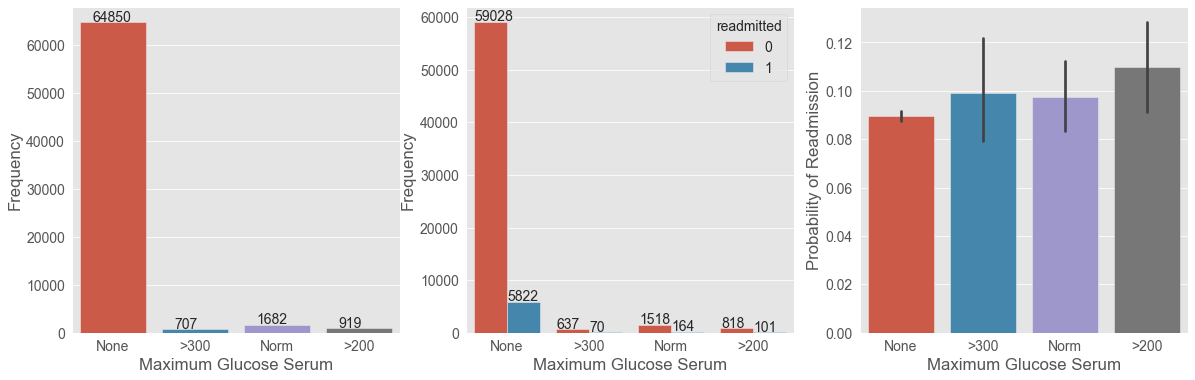

In [23]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["max_glu_serum"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Maximum Glucose Serum",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "max_glu_serum", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+250))
ax1.set_xlabel("Maximum Glucose Serum")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="max_glu_serum", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+250))
ax2.set_xlabel('Maximum Glucose Serum')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "max_glu_serum", y="readmitted", data = df)
ax3.set_xlabel("Maximum Glucose Serum")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring HbA1c

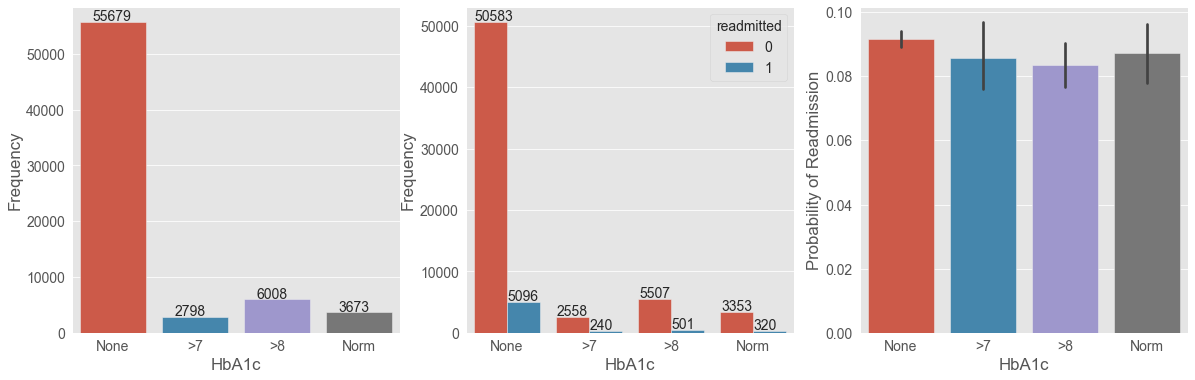

In [24]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["HbA1c"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of HbA1c",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "HbA1c", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+250))
ax1.set_xlabel("HbA1c")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="HbA1c", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.01, p.get_height()+250))
ax2.set_xlabel('HbA1c')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "HbA1c", y="readmitted", data = df)
ax3.set_xlabel("HbA1c")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Metformin

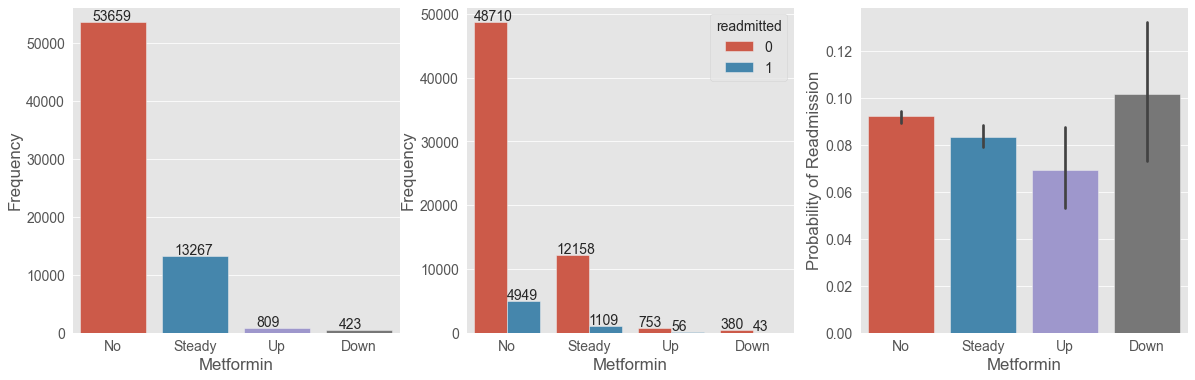

In [25]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["metformin"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Metformin",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "metformin", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+250))
ax1.set_xlabel("Metformin")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="metformin", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x(), p.get_height()+250))
ax2.set_xlabel('Metformin')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "metformin", y="readmitted", data = df)
ax3.set_xlabel("Metformin")
ax3.set_ylabel("Probability of Readmission")

plt.show()

In [26]:
df["metformin"] = df["metformin"].replace({"Steady": "Yes",
                                           "Up": "Yes",
                                           "Down": "Yes"})
df["metformin"].unique()

array(['No', 'Yes'], dtype=object)

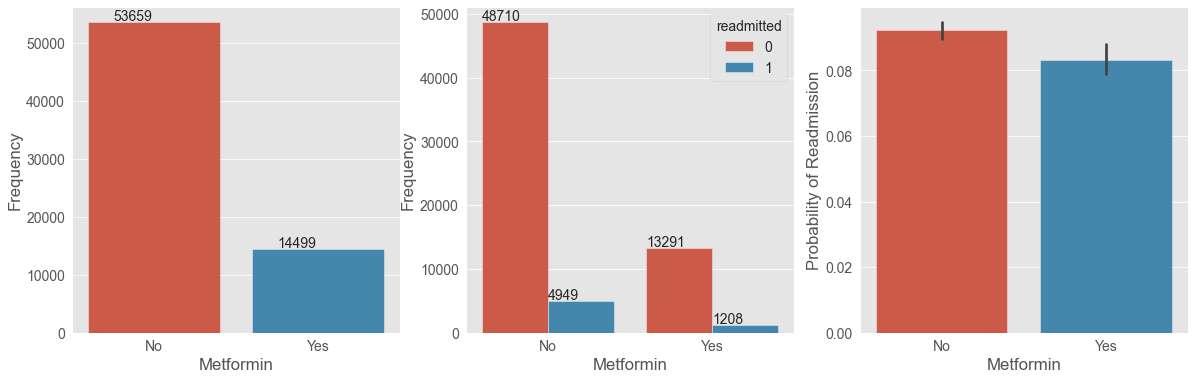

In [27]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["metformin"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Metformin",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "metformin", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+250))
ax1.set_xlabel("Metformin")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="metformin", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x(), p.get_height()+250))
ax2.set_xlabel('Metformin')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "metformin", y="readmitted", data = df)
ax3.set_xlabel("Metformin")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Glimepiride

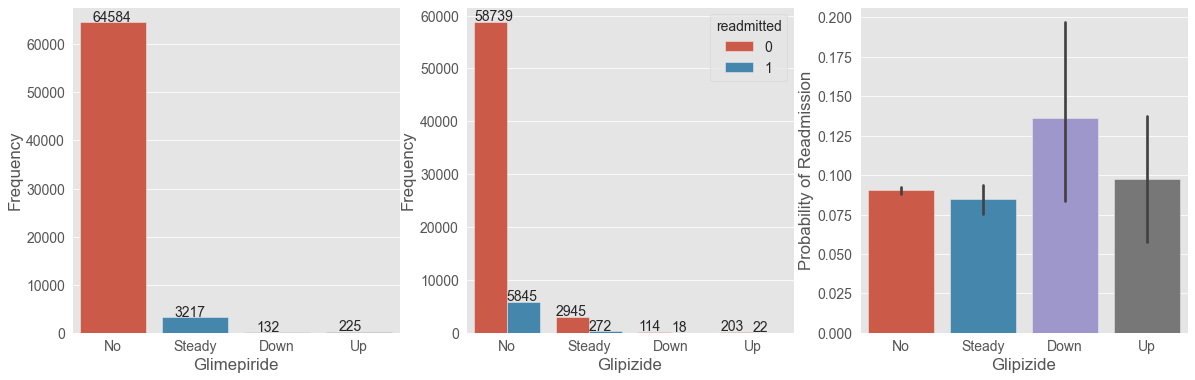

In [28]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["glimepiride"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Glimepiride",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "glimepiride", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+250))
ax1.set_xlabel("Glimepiride")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="glimepiride", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x(), p.get_height()+250))
ax2.set_xlabel('Glipizide')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "glimepiride", y="readmitted", data = df)
ax3.set_xlabel("Glipizide")
ax3.set_ylabel("Probability of Readmission")

plt.show()

In [29]:
df["glimepiride"] = df["glimepiride"].replace({"Steady": "Yes",
                                           "Up": "Yes",
                                           "Down": "Yes"})
df["glimepiride"].unique()

array(['No', 'Yes'], dtype=object)

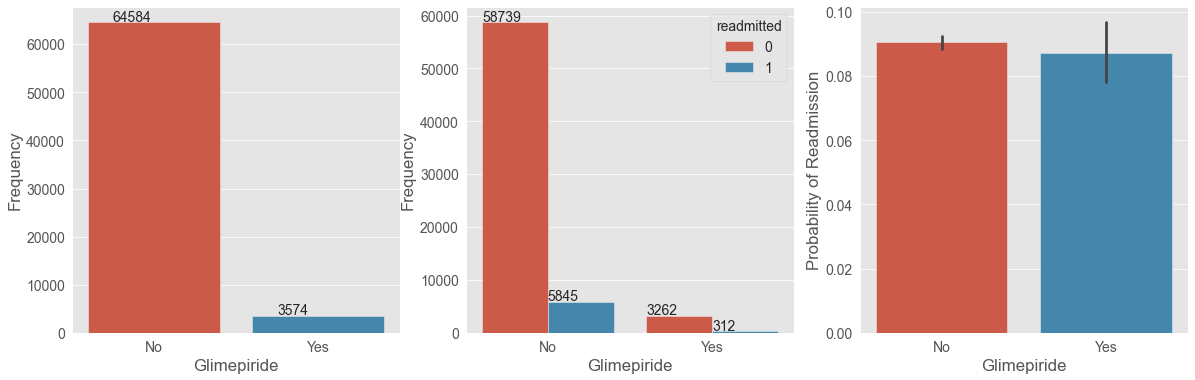

In [30]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["glimepiride"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Glimepiride",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "glimepiride", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.15, p.get_height()+250))
ax1.set_xlabel("Glimepiride")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="glimepiride", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x(), p.get_height()+250))
ax2.set_xlabel('Glimepiride')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "glimepiride", y="readmitted", data = df)
ax3.set_xlabel("Glimepiride")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Glipizide

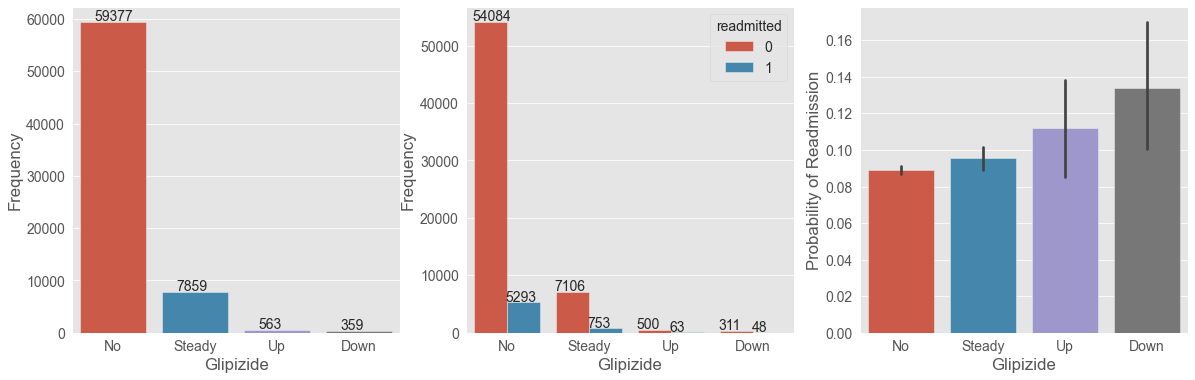

In [31]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["glipizide"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Glipizide",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "glipizide", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.17, p.get_height()+250))
ax1.set_xlabel("Glipizide")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="glipizide", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()-0.02, p.get_height()+250))
ax2.set_xlabel('Glipizide')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "glipizide", y="readmitted", data = df)
ax3.set_xlabel("Glipizide")
ax3.set_ylabel("Probability of Readmission")

plt.show()

In [32]:
df["glipizide"] = df["glipizide"].replace({"Steady": "Yes",
                                               "Up": "Yes",
                                               "Down": "Yes"})
df["glipizide"].unique()

array(['No', 'Yes'], dtype=object)

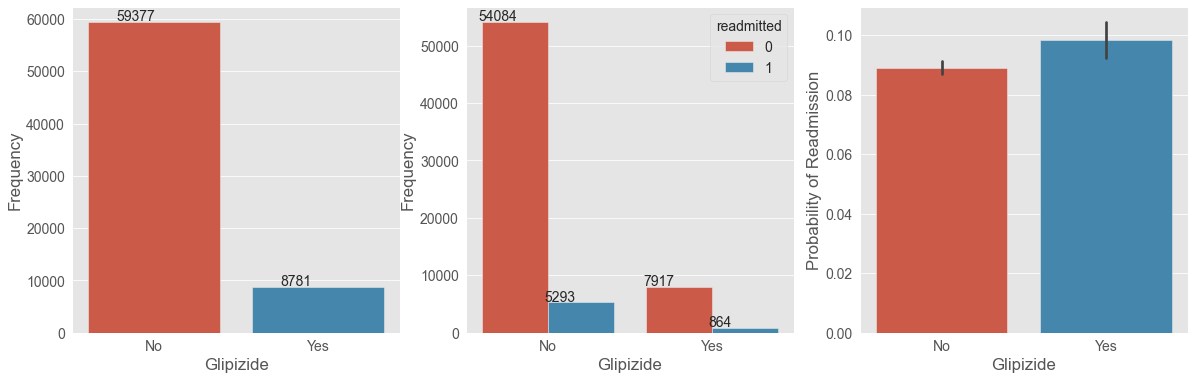

In [33]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["glipizide"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Glipizide",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "glipizide", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.17, p.get_height()+250))
ax1.set_xlabel("Glipizide")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="glipizide", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()-0.02, p.get_height()+250))
ax2.set_xlabel('Glipizide')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "glipizide", y="readmitted", data = df)
ax3.set_xlabel("Glipizide")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Glyburide

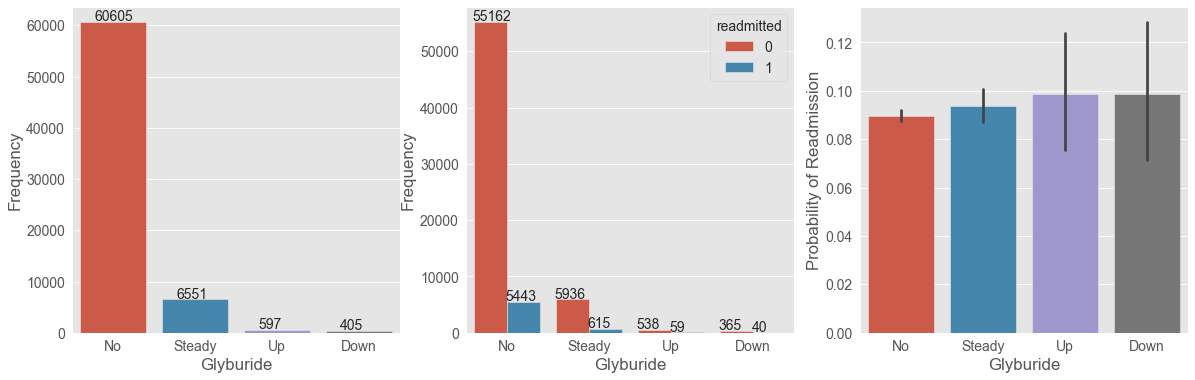

In [34]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["glyburide"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Glyburide",
#                                                                          ax=axes[0])


ax1 = sns.countplot(ax=axes[0], x = "glyburide", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.17, p.get_height()+250))
ax1.set_xlabel("Glyburide")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="glyburide", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()-0.02, p.get_height()+250))
ax2.set_xlabel('Glyburide')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "glyburide", y="readmitted", data = df)
ax3.set_xlabel("Glyburide")
ax3.set_ylabel("Probability of Readmission")

plt.show()

In [35]:
df["glyburide"] = df["glyburide"].replace({"Steady": "Yes",
                                               "Up": "Yes",
                                               "Down": "Yes"})
df["glyburide"].unique()

array(['No', 'Yes'], dtype=object)

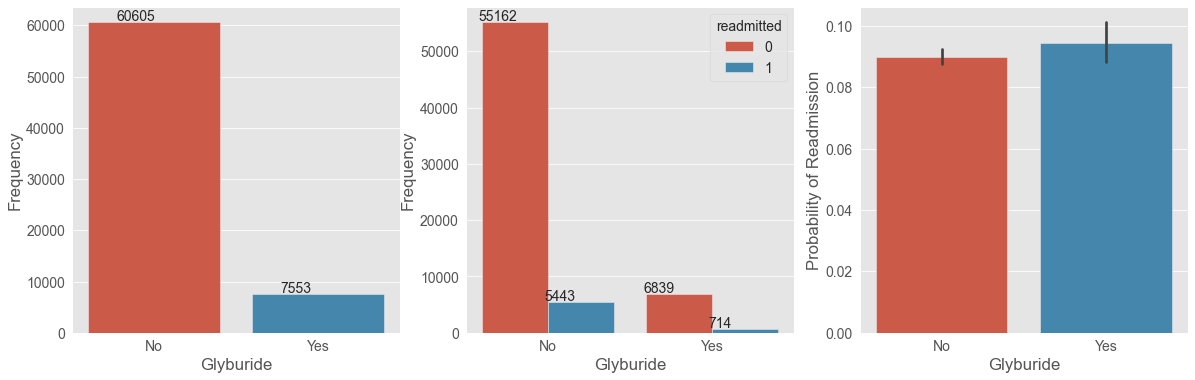

In [36]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["glipizide"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Glipizide",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "glyburide", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.17, p.get_height()+250))
ax1.set_xlabel("Glyburide")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="glyburide", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()-0.02, p.get_height()+250))
ax2.set_xlabel('Glyburide')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "glyburide", y="readmitted", data = df)
ax3.set_xlabel("Glyburide")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Pioglitazone

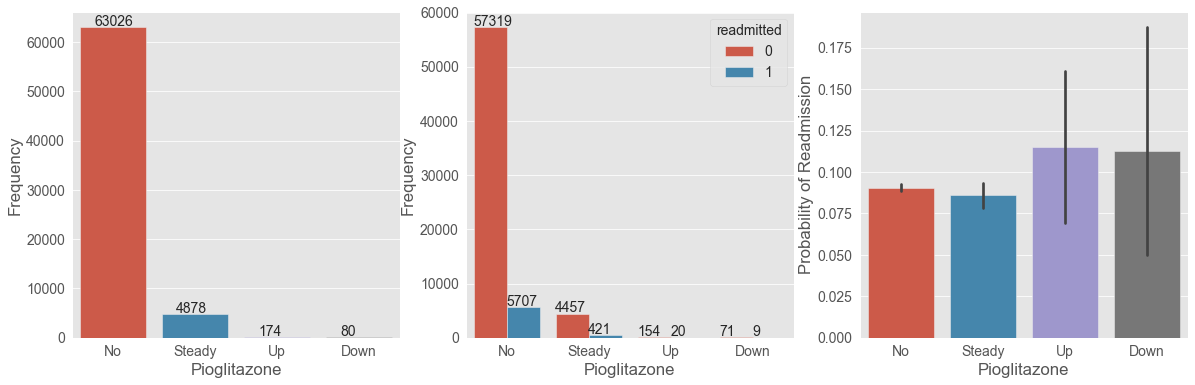

In [37]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["pioglitazone"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Pioglitazone",
#                                                                          ax=axes[0])


ax1 = sns.countplot(ax=axes[0], x = "pioglitazone", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.17, p.get_height()+250))
ax1.set_xlabel("Pioglitazone")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="pioglitazone", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()-0.01, p.get_height()+250))
ax2.set_xlabel('Pioglitazone')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "pioglitazone", y="readmitted", data = df)
ax3.set_xlabel("Pioglitazone")
ax3.set_ylabel("Probability of Readmission")

plt.show()

In [38]:
df["pioglitazone"] = df["pioglitazone"].replace({"Steady": "Yes",
                                               "Up": "Yes",
                                               "Down": "Yes"})

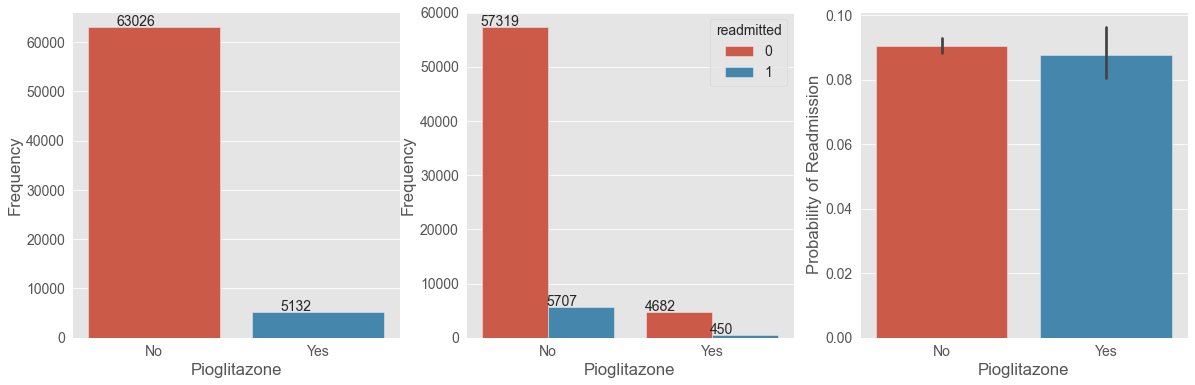

In [39]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["pioglitazone"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Pioglitazone",
#                                                                          ax=axes[0])


ax1 = sns.countplot(ax=axes[0], x = "pioglitazone", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.17, p.get_height()+250))
ax1.set_xlabel("Pioglitazone")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="pioglitazone", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()-0.01, p.get_height()+250))
ax2.set_xlabel('Pioglitazone')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "pioglitazone", y="readmitted", data = df)
ax3.set_xlabel("Pioglitazone")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Rosiglitazone

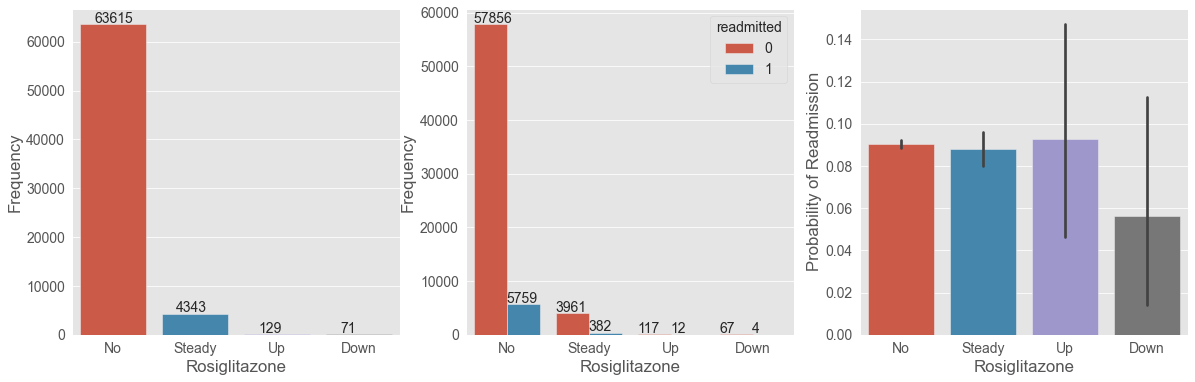

In [40]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["rosiglitazone"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Rosiglitazone",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "rosiglitazone", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.17, p.get_height()+250))
ax1.set_xlabel("Rosiglitazone")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="rosiglitazone", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()-0.01, p.get_height()+250))
ax2.set_xlabel('Rosiglitazone')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "rosiglitazone", y="readmitted", data = df)
ax3.set_xlabel("Rosiglitazone")
ax3.set_ylabel("Probability of Readmission")

plt.show()

In [41]:
df["rosiglitazone"] = df["rosiglitazone"].replace({"Steady": "Yes",
                                               "Up": "Yes",
                                               "Down": "Yes"})

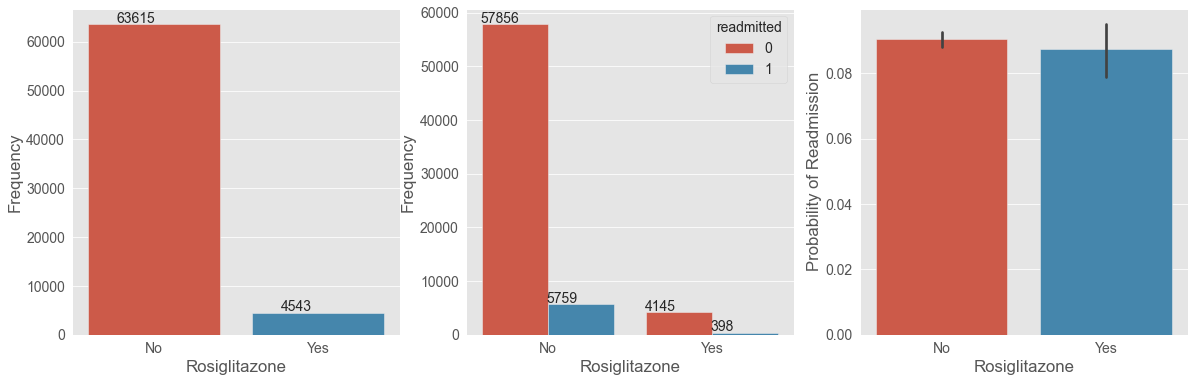

In [42]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["rosiglitazone"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Rosiglitazone",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "rosiglitazone", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.17, p.get_height()+250))
ax1.set_xlabel("Rosiglitazone")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="rosiglitazone", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()-0.01, p.get_height()+250))
ax2.set_xlabel('Rosiglitazone')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "rosiglitazone", y="readmitted", data = df)
ax3.set_xlabel("Rosiglitazone")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Insulin

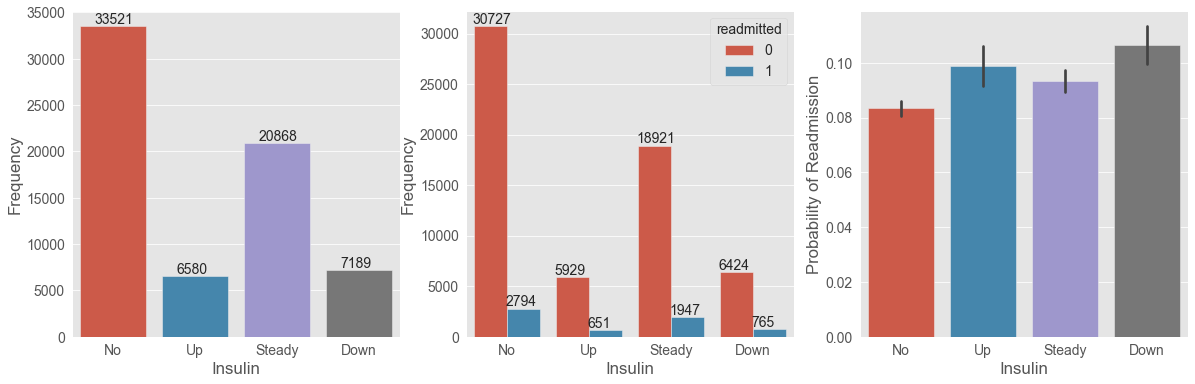

In [43]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["insulin"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Insulin",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "insulin", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.17, p.get_height()+250))
ax1.set_xlabel("Insulin")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="insulin", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()-0.02, p.get_height()+250))
ax2.set_xlabel('Insulin')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "insulin", y="readmitted", data = df)
ax3.set_xlabel("Insulin")
ax3.set_ylabel("Probability of Readmission")

plt.show()

In [44]:
df["insulin"] = df["insulin"].replace({"Steady": "Yes",
                                               "Up": "Yes",
                                               "Down": "Yes"})

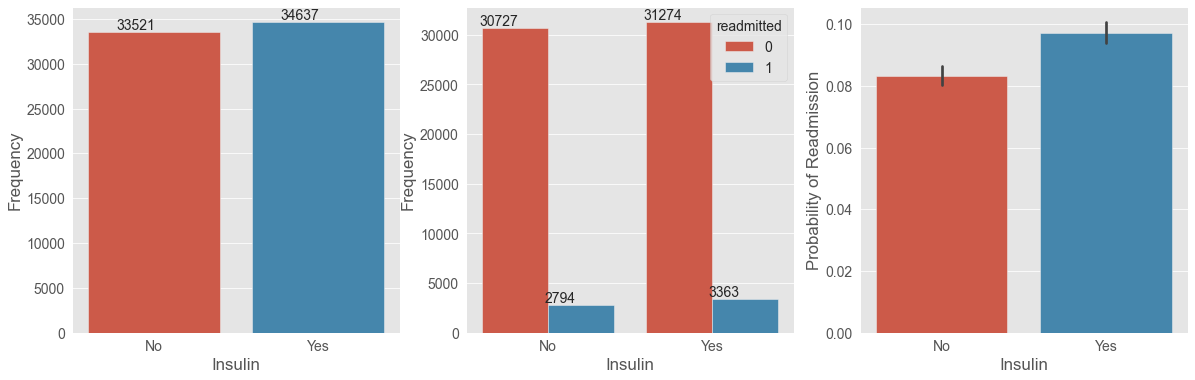

In [45]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["insulin"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Insulin",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "insulin", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.17, p.get_height()+250))
ax1.set_xlabel("Insulin")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="insulin", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()-0.02, p.get_height()+250))
ax2.set_xlabel('Insulin')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "insulin", y="readmitted", data = df)
ax3.set_xlabel("Insulin")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Change

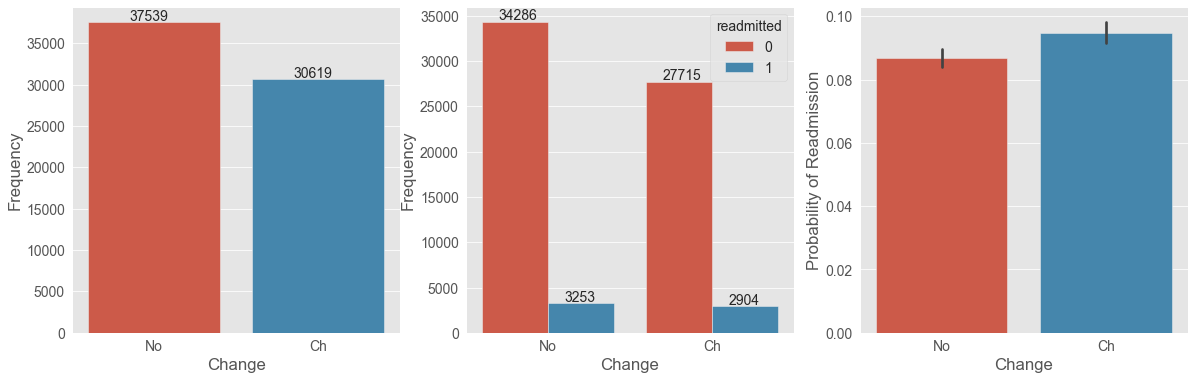

In [46]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["change"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Change",
#                                                                          ax=axes[0])


ax1 = sns.countplot(ax=axes[0], x = "change", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+250))
ax1.set_xlabel("Change")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="change", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+250))
ax2.set_xlabel('Change')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "change", y="readmitted", data = df)
ax3.set_xlabel("Change")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Diabetes Medication

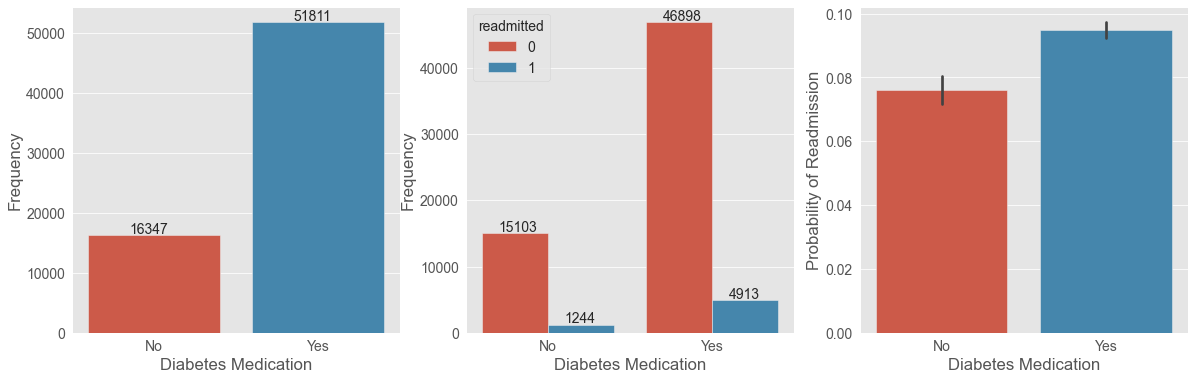

In [47]:
fig, axes = plt.subplots(1,3, figsize=(20,6))

#ax1 = X_categorical["diabetesMed"].value_counts().plot(kind = "barh", 
#                                                                          title = "Distribution of Diabetes Medication",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "diabetesMed", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+250))
ax1.set_xlabel("Diabetes Medication")
ax1.set_ylabel("Frequency")


ax2 = sns.countplot(ax=axes[1],x="diabetesMed", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+250))
ax2.set_xlabel('Diabetes Medication')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "diabetesMed", y="readmitted", data = df)
ax3.set_xlabel("Diabetes Medication")
ax3.set_ylabel("Probability of Readmission")

plt.show()

### Exploring Primary Diagnosis

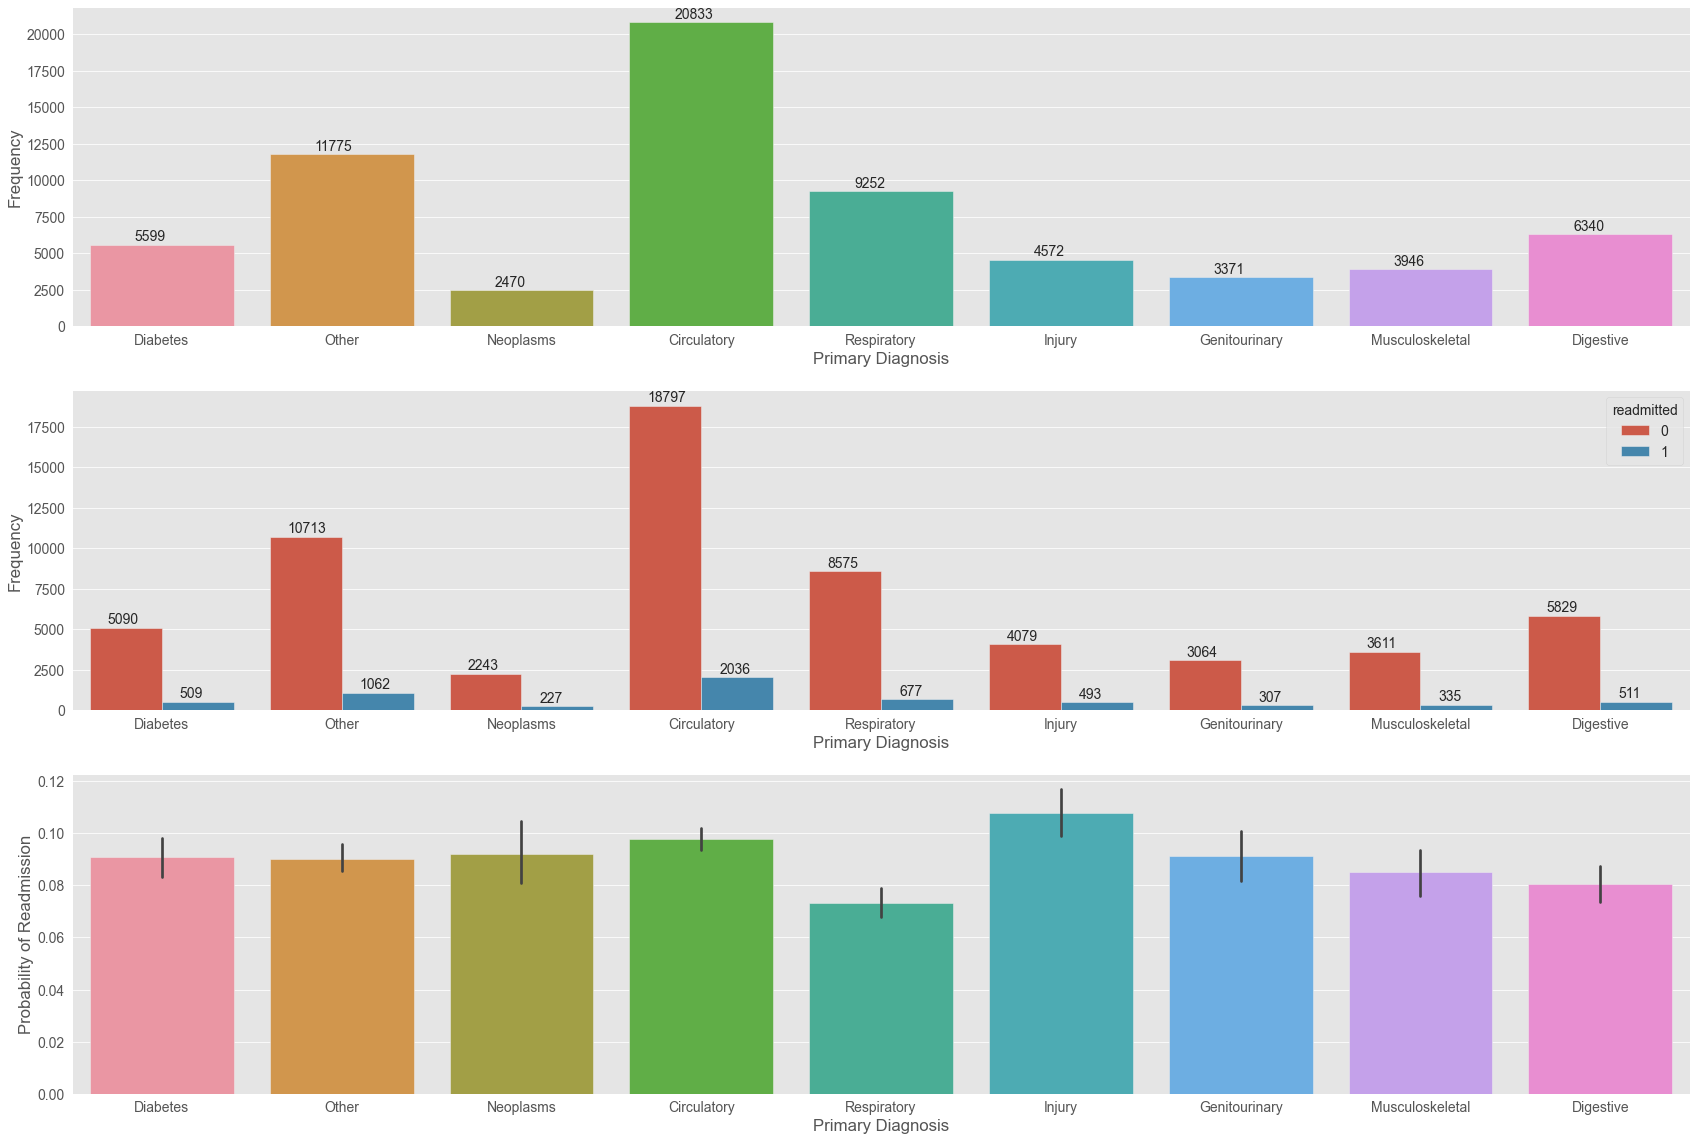

In [48]:
fig, axes = plt.subplots(3,1, figsize=(29,20))

#ax1 = X_categorical["primary_diagnosis"].value_counts().plot(kind = "bar", 
#                                                                          title = "Distribution of Primary Diagnosis",
#                                                                          ax=axes[0])

ax1 = sns.countplot(ax=axes[0], x = "primary_diagnosis", data = df)
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+250))
ax1.set_xlabel("Primary Diagnosis")
ax1.set_ylabel("Frequency")
#ax1;


ax2 = sns.countplot(ax=axes[1],x="primary_diagnosis", hue= "readmitted", data = df)
#plt.title("Readmitted Flag by Primary Diagnosis")
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+250))
ax2.set_xlabel('Primary Diagnosis')
ax2.set_ylabel('Frequency')

ax3 = sns.barplot(ax=axes[2],x = "primary_diagnosis", y="readmitted", data = df)
ax3.set_xlabel("Primary Diagnosis")
ax3.set_ylabel("Probability of Readmission")
#plt.ylabel('Probability of Readmitting')
#plt.xlabel('Primary Diagnosis')
#for p in ax2.patches:
#        ax2.annotate(p.get_height(), (p.get_x()+0.05, p.get_height()+250))

plt.show()

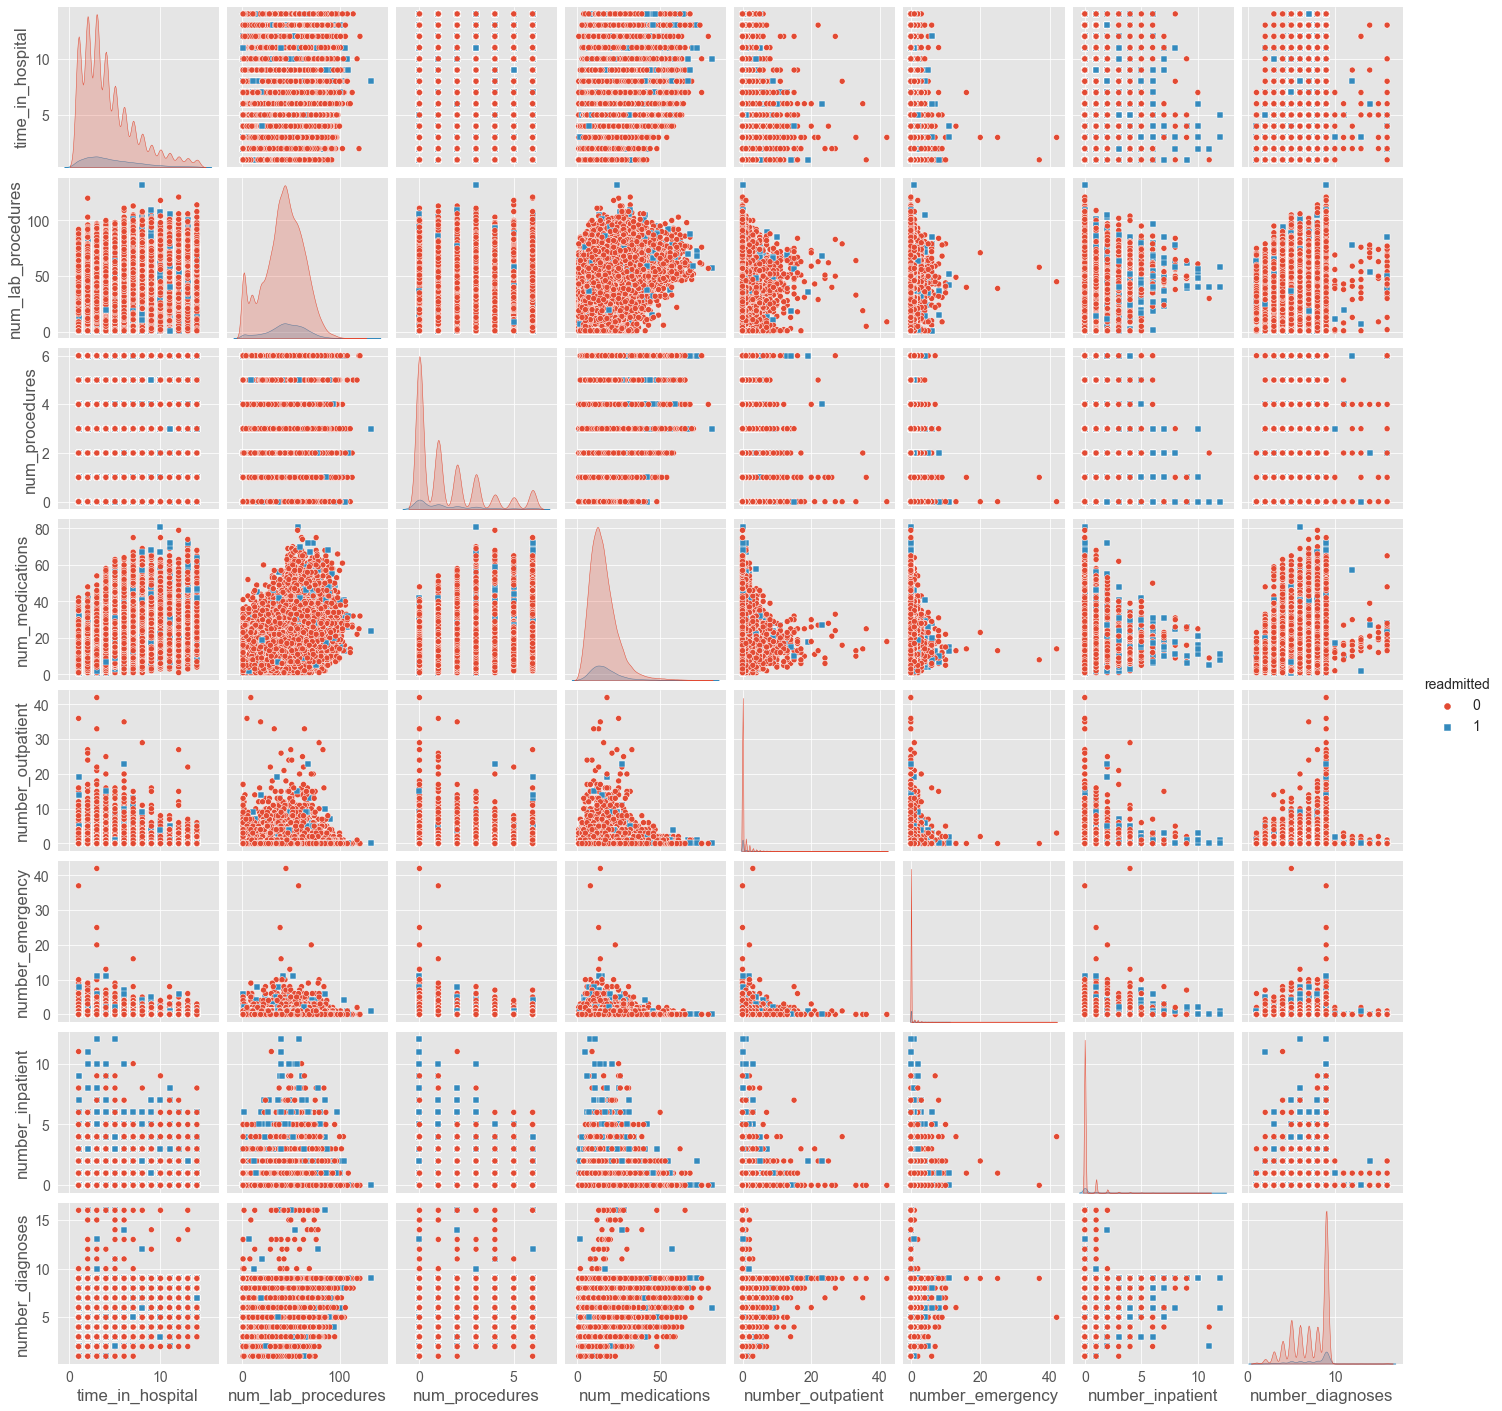

In [49]:
sns.pairplot(df, hue="readmitted", markers=["o", "s"]);

## Multicollinearity

In [50]:
correlations = X_continuous.corr()
correlations

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
time_in_hospital,1.000000,0.330583,0.190228,0.468047,-0.016688,-0.009934,0.063797,0.234081
num_lab_procedures,0.330583,1.000000,0.043929,0.257404,-0.009329,0.015476,0.080175,0.152737
num_procedures,0.190228,0.043929,1.000000,0.400675,-0.019180,-0.035424,-0.023461,0.084946
num_medications,0.468047,0.257404,0.400675,1.000000,0.025914,0.002808,0.039458,0.256382
number_outpatient,-0.016688,-0.009329,-0.019180,0.025914,1.000000,0.094921,0.067576,0.075763
number_emergency,-0.009934,0.015476,-0.035424,0.002808,0.094921,1.000000,0.146811,0.048267
number_inpatient,0.063797,0.080175,-0.023461,0.039458,0.067576,0.146811,1.000000,0.067780
number_diagnoses,0.234081,0.152737,0.084946,0.256382,0.075763,0.048267,0.067780,1.000000


AxesSubplot(0.125,0.125;0.62x0.755)


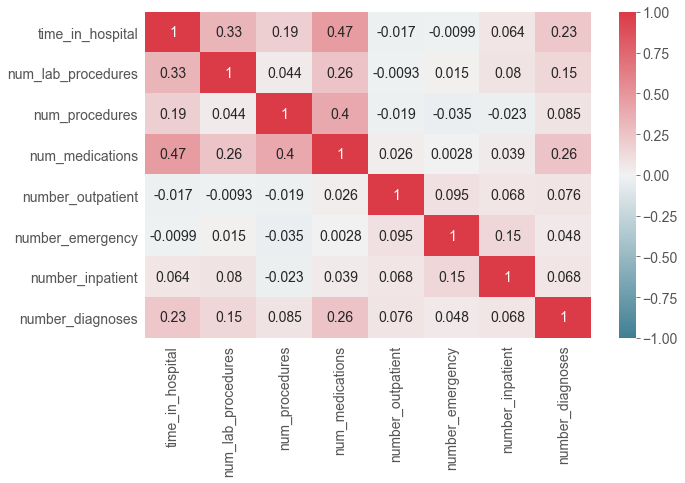

In [51]:
cmap = sns.diverging_palette(220, 10, as_cmap=True);
print (sns.heatmap(correlations,  vmin=-1, vmax=1, cmap=cmap,  annot=True ));


# ANALYSIS

### Creating dummies

In [52]:
data = pd.get_dummies(df)

### Train Test Split

Data was splitted into 75% training set and 25% testing set ensuring that the percentage of readmissions in the whole dataset is maintained in the respective sets.

In [53]:
y = data["readmitted"]
X = data.drop(["readmitted"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, stratify = y)

In [54]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (51118, 61)
y_train shape: (51118,)
X_test shape: (17040, 61)
y_test shape: (17040,)


In [55]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.90966
1    0.09034
Name: readmitted, dtype: float64
0    0.909683
1    0.090317
Name: readmitted, dtype: float64


### Standardizing/Scaling the data

In [56]:
# Scale the data
scaler = StandardScaler().fit(X_train)

X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [57]:
# # Import RandomForestClassifier from scikit's ensemble module
# from sklearn.ensemble import RandomForestClassifier


# # Specify your Random Forest Classifier model object with n_estimators or
# #the number of trees in the forest set to 20 (default is 10)
# model = RandomForestClassifier(n_estimators = 500, random_state = 345)


# # Fit your model on the features (X) and the target (y)
# model.fit(X, y) 

# feature_importances = model.feature_importances_ 
# features = sorted(zip(X.columns, model.feature_importances_), key = lambda x: x[1])
# cols = [f[0] for f in features]
# width = [f[1] for f in features]

# fig, ax = plt.subplots()

# fig.set_size_inches(10,20)
# plt.margins(y=.001)

# ax.barh(y=cols, width=width)

# plt.show()

### Modeling

#### Random Forest

The random forest on both the scaled and unscaled features show an accuracy of over 0.9 but an AUC of below 0.6. This can be explained by the confusion matrix which shows that the model barely predict readmitted = 1  

In [58]:
# Import RandomForestClassifier from scikit's ensemble module
from sklearn.ensemble import RandomForestClassifier


# Specify your Random Forest Classifier model object with n_estimators or
#the number of trees in the forest set to 20 (default is 10)
model = RandomForestClassifier(n_estimators = 100, random_state=2512)


# Fit your model on the features (X) and the target (y)
model.fit(X_train, y_train) #set to train

# scikit learn implementation 
y_pred = model.predict(X_test) #returns 0 or 1

pred_proba = model.predict_proba(X_test)[:,1] # returns predicted probabilites 

print("Accuracy", accuracy_score(y_test, y_pred).round(3))
print("AUC", roc_auc_score(y_test, pred_proba).round(3))
print(classification_report(y_test, y_pred,
                         target_names=['not readmitted', 'readmitted']))   
print(confusion_matrix(y_test, y_pred))


Accuracy 0.909
AUC 0.582
                precision    recall  f1-score   support

not readmitted       0.91      1.00      0.95     15501
    readmitted       0.00      0.00      0.00      1539

      accuracy                           0.91     17040
     macro avg       0.45      0.50      0.48     17040
  weighted avg       0.83      0.91      0.87     17040

[[15493     8]
 [ 1539     0]]


In [59]:
# Import RandomForestClassifier from scikit's ensemble module
from sklearn.ensemble import RandomForestClassifier


# Specify your Random Forest Classifier model object with n_estimators or
#the number of trees in the forest set to 20 (default is 10)
model = RandomForestClassifier(n_estimators = 100, random_state=2512)


# Fit your model on the features (X) and the target (y)
model.fit(X_scaled_train, y_train) #set to train

# scikit learn implementation 
y_pred = model.predict(X_scaled_test) #returns 0 or 1

pred_proba = model.predict_proba(X_scaled_test)[:,1] # returns predicted probabilites 

print("Accuracy", accuracy_score(y_test, y_pred).round(3))
print("AUC", roc_auc_score(y_test, pred_proba).round(3))
print(classification_report(y_test, y_pred,
                         target_names=['not readmitted', 'readmitted']))   
print(confusion_matrix(y_test, y_pred))


Accuracy 0.909
AUC 0.582
                precision    recall  f1-score   support

not readmitted       0.91      1.00      0.95     15501
    readmitted       0.00      0.00      0.00      1539

      accuracy                           0.91     17040
     macro avg       0.45      0.50      0.48     17040
  weighted avg       0.83      0.91      0.87     17040

[[15494     7]
 [ 1539     0]]


### Logistic Regression

Similar conlusion can be arrived for logistic regression as with random forest. The high accuracy is as a result of predicting non readmissions preisely whilst predicting readmissions poorly. To solve this conundrum, there may be the need to balance the dataset. 

In [60]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(tol = 0.01, solver = "saga")
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test) 

#y_pred = result_full.predict(X)
##y_pred = y_pre#d.apply(lambda x: 1 if x > .5 else 0)

#coef = model2.coef_[0]

#name = ['num_lab_procedures', 'num_medications', 'time_in_hospital', 'num_procedures', 
#                   'number_diagnoses', 'gender_Male', 'number_inpatient']

#pd.DataFrame([name,coef],index = ['Name','Coef']).transpose().sort_values(by='Coef')

In [61]:
pred_proba = model2.predict_proba(X_test)[:,1] # returns predicted probabilites 

print("Accuracy", accuracy_score(y_test, y_pred).round(3))
print("AUC", roc_auc_score(y_test, pred_proba).round(3))
print(classification_report(y_test, y_pred, target_names=['not readmitted', 'readmitted']))  
print(confusion_matrix(y_test, y_pred))


Accuracy 0.91
AUC 0.626
                precision    recall  f1-score   support

not readmitted       0.91      1.00      0.95     15501
    readmitted       0.50      0.00      0.01      1539

      accuracy                           0.91     17040
     macro avg       0.71      0.50      0.48     17040
  weighted avg       0.87      0.91      0.87     17040

[[15494     7]
 [ 1532     7]]


In [62]:
from sklearn.linear_model import LogisticRegression

model3 = LogisticRegression(tol = 0.001, solver = "saga")
model3.fit(X_scaled_train, y_train)
y_pred = model3.predict(X_scaled_test) 


In [63]:
pred_proba = model3.predict_proba(X_scaled_test)[:,1] # returns predicted probabilites 

print("Accuracy", accuracy_score(y_test, y_pred).round(3))
print("AUC", roc_auc_score(y_test, pred_proba).round(3))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['not readmitted', 'readmitted']))  
print(confusion_matrix(y_test, y_pred))


Accuracy 0.91
AUC 0.628
[[15494     7]
 [ 1532     7]]
                precision    recall  f1-score   support

not readmitted       0.91      1.00      0.95     15501
    readmitted       0.50      0.00      0.01      1539

      accuracy                           0.91     17040
     macro avg       0.71      0.50      0.48     17040
  weighted avg       0.87      0.91      0.87     17040

[[15494     7]
 [ 1532     7]]


## Balancing the Dataset Using the Downsampling Technique

Downsampling the majority class

In [75]:
data_readmitted = data[data["readmitted"] == 1]

data_not_readmitted = data[data["readmitted"] == 0]

tmp = [data_readmitted.sample(6100, random_state = 1), data_not_readmitted.sample(6100, random_state = 1)]
#tmp = [data_readmitted, data_not_readmitted[:6157]]
data_ds = pd.concat(tmp)
#data_ds.info()

### Train Test Split of downsampled dataset

In [76]:
y_ds = data_ds["readmitted"]
X_ds = data_ds.drop(["readmitted"], axis = 1)

X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X_ds, y_ds, random_state = 10, stratify = y_ds)

y_ds.value_counts()

1    6100
0    6100
Name: readmitted, dtype: int64

In [77]:
print("X_train shape:", X_train_ds.shape)
print("y_train shape:", y_train_ds.shape)
print("X_test shape:", X_test_ds.shape)
print("y_test shape:", y_test_ds.shape)

X_train shape: (9150, 61)
y_train shape: (9150,)
X_test shape: (3050, 61)
y_test shape: (3050,)


### Standardizing/Scaling the dataset

In [78]:
# Scale the data
scaler = StandardScaler().fit(X_train_ds)

X_scaled_train_ds = scaler.transform(X_train_ds)
X_scaled_test_ds = scaler.transform(X_test_ds)

### Logistic Regression

In [79]:
# train logistic regression, evaluate on test, and set target_predicted_ds as the predicted
lr_ds = LogisticRegression(tol=0.01, solver = "saga")
lr_ds.fit(X_train_ds, y_train_ds)
y_predicted_ds = lr_ds.predict(X_test_ds)

In [80]:
pred_proba_ds = lr_ds.predict_proba(X_test_ds)[:,1]

print("Accuracy", accuracy_score(y_test_ds, y_predicted_ds).round(3))
print("AUC", roc_auc_score(y_test_ds, pred_proba_ds).round(3))
print(confusion_matrix(y_test_ds, y_predicted_ds))
print(classification_report(y_test_ds, y_predicted_ds, target_names=['not readmitted', 'readmitted']))  
print(confusion_matrix(y_test_ds, y_predicted_ds))


Accuracy 0.6
AUC 0.641
[[927 598]
 [622 903]]
                precision    recall  f1-score   support

not readmitted       0.60      0.61      0.60      1525
    readmitted       0.60      0.59      0.60      1525

      accuracy                           0.60      3050
     macro avg       0.60      0.60      0.60      3050
  weighted avg       0.60      0.60      0.60      3050

[[927 598]
 [622 903]]


In [81]:
# train logistic regression, evaluate on test, and set target_predicted_ds as the predicted
lr_st_ds = LogisticRegression(tol = 0.01, solver="saga")
lr_st_ds.fit(X_scaled_train_ds, y_train_ds)
y_st_predicted_ds = lr_ds.predict(X_scaled_test_ds)

In [82]:
pred_proba_st_ds = lr_st_ds.predict_proba(X_scaled_test_ds)[:,1]

print("Accuracy", accuracy_score(y_test_ds, y_st_predicted_ds).round(3))
print("AUC", roc_auc_score(y_test_ds, pred_proba_st_ds).round(3))
print(confusion_matrix(y_test_ds, y_st_predicted_ds))
print(classification_report(y_test_ds, y_st_predicted_ds, target_names=['not readmitted', 'readmitted']))  
print(confusion_matrix(y_test_ds, y_st_predicted_ds))


Accuracy 0.592
AUC 0.639
[[951 574]
 [669 856]]
                precision    recall  f1-score   support

not readmitted       0.59      0.62      0.60      1525
    readmitted       0.60      0.56      0.58      1525

      accuracy                           0.59      3050
     macro avg       0.59      0.59      0.59      3050
  weighted avg       0.59      0.59      0.59      3050

[[951 574]
 [669 856]]


### Random Forest

In [83]:
# Import RandomForestClassifier from scikit's ensemble module
from sklearn.ensemble import RandomForestClassifier


# Specify your Random Forest Classifier model object with n_estimators or
#the number of trees in the forest set to 20 (default is 10)
model = RandomForestClassifier(n_estimators = 170, max_depth = 10, random_state=12322)


# Fit your model on the features (X) and the target (y)
model.fit(X_scaled_train_ds, y_train_ds) #set to train

# scikit learn implementation 
y_pred = model.predict(X_scaled_test_ds) #returns 0 or 1

pred_proba = model.predict_proba(X_scaled_test_ds)[:,1] # returns predicted probabilites 

print("Accuracy", accuracy_score(y_test_ds, y_pred).round(3))
print("AUC", roc_auc_score(y_test_ds, pred_proba).round(3))
print(classification_report(y_test_ds, y_pred,
                         target_names=['not readmitted', 'readmitted']))   
print(confusion_matrix(y_test_ds, y_pred))


Accuracy 0.602
AUC 0.644
                precision    recall  f1-score   support

not readmitted       0.61      0.57      0.59      1525
    readmitted       0.60      0.63      0.61      1525

      accuracy                           0.60      3050
     macro avg       0.60      0.60      0.60      3050
  weighted avg       0.60      0.60      0.60      3050

[[870 655]
 [559 966]]


In [84]:
# Import RandomForestClassifier from scikit's ensemble module
from sklearn.ensemble import RandomForestClassifier


# Specify your Random Forest Classifier model object with n_estimators or
#the number of trees in the forest set to 20 (default is 10)
model = RandomForestClassifier(random_state=45)


# Fit your model on the features (X) and the target (y)
model.fit(X_scaled_train_ds, y_train_ds) #set to train

# scikit learn implementation 
y_pred = model.predict(X_scaled_test_ds) #returns 0 or 1

pred_proba = model.predict_proba(X_scaled_test_ds)[:,1] # returns predicted probabilites 

print("Accuracy", accuracy_score(y_test_ds, y_pred).round(3))
print("AUC", roc_auc_score(y_test_ds, pred_proba).round(3))
print(classification_report(y_test_ds, y_pred,
                         target_names=['not readmitted', 'readmitted']))   
print(confusion_matrix(y_test_ds, y_pred))


Accuracy 0.592
AUC 0.622
                precision    recall  f1-score   support

not readmitted       0.59      0.58      0.59      1525
    readmitted       0.59      0.60      0.60      1525

      accuracy                           0.59      3050
     macro avg       0.59      0.59      0.59      3050
  weighted avg       0.59      0.59      0.59      3050

[[888 637]
 [608 917]]


In [85]:
# Import RandomForestClassifier from scikit's ensemble module
from sklearn.ensemble import RandomForestClassifier


y_ds = data_ds["readmitted"]
X_ds = data_ds.drop(["readmitted"], axis = 1)


interactionterms = [('time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin_Yes',
       'glimepiride_Yes', 'glipizide_Yes',
       'glyburide_Yes', 'pioglitazone_Yes',
        'rosiglitazone_Yes', 'insulin_Yes')]

for inter in interactionterms:
    name = inter[0] + '|' + inter[1]
    X_ds[name] = X_ds[inter[0]] * X_ds[inter[1]]

X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X_ds, y_ds, test_size = 0.2, random_state = 0, stratify = y_ds)

# Scale the data
scaler = StandardScaler().fit(X_train_ds)

X_scaled_train_ds = scaler.transform(X_train_ds)
X_scaled_test_ds = scaler.transform(X_test_ds)


# Specify your Random Forest Classifier model object with n_estimators or
#the number of trees in the forest set to 400 (default is 10)
model = RandomForestClassifier(n_estimators = 400, max_depth = 10, random_state=12322)

# Fit your model on the features (X) and the target (y)
model.fit(X_scaled_train_ds, y_train_ds) #set to train

# scikit learn implementation 
y_pred = model.predict(X_scaled_test_ds) #returns 0 or 1

pred_proba = model.predict_proba(X_scaled_test_ds)[:,1] # returns predicted probabilites 

print("Accuracy", accuracy_score(y_test_ds, y_pred).round(3))
print("AUC", roc_auc_score(y_test_ds, pred_proba).round(3))
print(classification_report(y_test_ds, y_pred,
                         target_names=['not readmitted', 'readmitted']))   
print(confusion_matrix(y_test_ds, y_pred))


Accuracy 0.593
AUC 0.62
                precision    recall  f1-score   support

not readmitted       0.59      0.59      0.59      1220
    readmitted       0.59      0.60      0.60      1220

      accuracy                           0.59      2440
     macro avg       0.59      0.59      0.59      2440
  weighted avg       0.59      0.59      0.59      2440

[[714 506]
 [488 732]]


## Conclusion

Downsampling the majority class solves the problem of difficulty in classifying the minority class. The best model was random forest with AUC 0.803.   